In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn import

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [7]:
df = pd.read_csv('Train_Dataset.csv', index_col=0)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7303 entries, 16167 to 15363
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7303 non-null   int64  
 1   sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
 13  target    7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 855.8 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
metadata = pd.read_csv('Variable_Definitions.csv')

feature_names = df.columns.to_list()[1:14]
metadata.insert(0, "column name", feature_names)

In [11]:
metadata

,column name,Variable defination
0,sex,age
1,cp,sex
2,trestbps,chest pain type (4 values)
3,chol,resting blood pressure
4,fbs,serum cholestoral in mg/dl
5,restecg,fasting blood sugar > 120 mg/dl
6,thalach,resting electrocardiographic results (values 0...
7,exang,maximum heart rate achieved
8,oldpeak,exercise induced angina
9,slope,oldpeak = ST depression induced by exercise re...


From the metadata, we can see that the cp, fbs, restecg, exang, ca and thal are categorical columns

In [12]:
df[['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']]

,thal,ca,slope,exang,restecg,fbs,cp,sex
id,,,,,,,,
16167,1,4,1,0,0,1,1,0
11275,0,1,2,0,1,0,2,1
13251,1,3,1,0,0,1,2,1
19921,2,2,0,1,2,1,0,0
11293,0,4,2,1,1,1,2,1
...,...,...,...,...,...,...,...,...
19401,0,0,1,0,2,1,2,1
10446,2,3,2,0,2,1,2,1
13219,2,0,0,1,0,1,0,1


In [13]:
#Convert the categorical columns to categorical datatype


df[['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'target']] = df[['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'target']].astype("category")

In [14]:
df.describe(include='category')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,7303,7303,7303,7303,7303,7303,7303,7303,7303
unique,2,4,2,3,2,3,5,4,2
top,0,1,0,2,1,0,2,1,1
freq,3654,1858,3702,2478,3675,2470,1505,1879,5941


help(pd.DataFrame.describe)

Variable defination
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

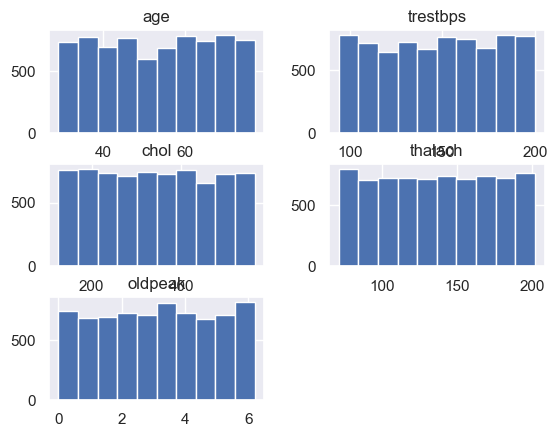

In [16]:
# Setting seaborn chart type
sns.set()

numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_nums = df[numerical_columns]
df_nums.hist()


df["Age"].hist()

## Feature Engineering

#### 4.1 Splitting the input and output dataset

In [17]:
input_df = df.drop('target', axis=1)
output_df = df["target"]

#### 4.2 Standardizing the numerical columns

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:


cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = MinMaxScaler().fit(input_df[cols_to_scale])

input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])

#### 4.3 Encoding categorical variables

help(OneHotEncoder)

In [20]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['thal', 'ca', 'slope', 'restecg', 'cp']

encoder = OneHotEncoder(sparse_output=False,  handle_unknown='ignore').fit(input_df[cols_to_encode])

encoded_cols = list(encoder.get_feature_names_out(cols_to_encode))

input_df[encoded_cols] = encoder.transform(input_df[cols_to_encode])

In [21]:
input_df = input_df.drop(cols_to_encode, axis=1)
input_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,thal_0,thal_1,...,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2,cp_0,cp_1,cp_2,cp_3
id,,,,,,,,,,,,,,,,,,,,,
16167,0.083333,0,0.603774,0.180365,1,0.633588,0,0.241935,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11275,0.500000,1,0.981132,0.063927,0,0.251908,0,0.129032,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13251,0.166667,1,0.066038,0.173516,1,0.641221,0,0.338710,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19921,0.958333,0,0.179245,0.410959,1,0.129771,1,0.790323,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11293,0.125000,1,0.424528,0.668950,1,0.725191,1,0.145161,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Inspecting that one hot encoding has been properly done

print(input_df.describe().loc[['min','max']])

#### Splitting into training and validation datasets

In [30]:
from sklearn.model_selection import train_test_split
SEED = 100

X_train, X_val, y_train, y_val = train_test_split(input_df.values, output_df.values, test_size=0.2, stratify=output_df, random_state=SEED)

In [32]:
X_train

array([[1.        , 1.        , 0.98113208, ..., 1.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.97169811, ..., 0.        , 1.        ,
        0.        ],
       [0.45833333, 0.        , 0.33962264, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 1.        , 0.59433962, ..., 0.        , 1.        ,
        0.        ],
       [0.27083333, 1.        , 0.16981132, ..., 0.        , 0.        ,
        1.        ],
       [0.08333333, 1.        , 0.09433962, ..., 0.        , 0.        ,
        0.        ]])

## 5. Model building

In [35]:
help(xgb.cv)

Help on function cv in module xgboost.training:

cv(params: Union[List, Dict[str, Any]], dtrain: xgboost.core.DMatrix, num_boost_round: int = 10, nfold: int = 3, stratified: bool = False, folds: sklearn.model_selection._split.StratifiedKFold = None, metrics: Sequence[str] = (), obj: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[numpy.ndarray, numpy.ndarray]]] = None, feval: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None, maximize: Optional[bool] = None, early_stopping_rounds: Optional[int] = None, fpreproc: Optional[Callable] = None, as_pandas: bool = True, verbose_eval: Union[bool, int, NoneType] = None, show_stdv: bool = True, seed: int = 0, callbacks: Optional[Sequence[xgboost.callback.TrainingCallback]] = None, shuffle: bool = True, custom_metric: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None) -> Union[Dict[str, float], pandas.core.frame.DataFrame]
    Cross-validation with given parameters.

In [27]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, seed = SEED)

xgb_model.fit(X_train.values, y_train)
xgb_model.score(X_val, y_val)

0.811088295687885

In [38]:
train_dmatrix = xgb.DMatrix(data=input_df.values, label=output_df.values)

params={"objective":"binary:logistic","max_depth":10}
cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=4,
num_boost_round=10, metrics="auc", as_pandas=True)



In [39]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.930227,0.002678,0.884202,0.003970
1,0.950388,0.002985,0.884013,0.002261
2,0.965606,0.004421,0.884527,0.004075
3,0.973359,0.003954,0.883949,0.003912
4,0.977701,0.003543,0.883261,0.004488
5,0.983031,0.002843,0.883633,0.004005
6,0.986511,0.003427,0.883984,0.004382
7,0.988973,0.002486,0.883760,0.003525
8,0.990773,0.002415,0.884132,0.004584
9,0.992334,0.001878,0.883624,0.005145


In [40]:
print("AUC: %f" %((cv_results["test-auc-mean"]).iloc[-1]))

AUC: 0.883624


In [42]:
xgb_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9], 'n_estimators': [200],'subsample': [0.3, 0.5, 0.9]}
xgb_cl = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=xgb_cl,param_grid=xgb_param_grid, scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(input_df.values, output_df.values)
print("Best parameters found: ",grid_mse.best_params_)
print("Best score found: ",grid_mse.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 200, 'subsample': 0.3}
Best score found:  0.8136386892526519


In [ ]:
print("Best parameters found: ",grid_mse.best_params_)

In [44]:
xgb_param_grid = {'learning_rate': [0.5], 'n_estimators': [400, 500, 600],'subsample': [0.1, 0.2, 0.3]}
xgb_cl = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=xgb_cl,param_grid=xgb_param_grid, scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(input_df.values, output_df.values)
print("Best parameters found: ",grid_mse.best_params_)
print("Best score found: ",grid_mse.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 400, 'subsample': 0.3}
Best score found:  0.8150079521073084


In [45]:
xgb_param_grid = {'learning_rate': [0.5], 'n_estimators': [400, 500, 600],'subsample': [0.1, 0.2, 0.3]}
xgb_cl = xgb.XGBClassifier(max_depth=10)
grid_mse = GridSearchCV(estimator=xgb_cl,param_grid=xgb_param_grid, scoring='accuracy', cv=4, verbose=1)
grid_mse.fit(input_df.values, output_df.values)
print("Best parameters found: ",grid_mse.best_params_)
print("Best score found: ",grid_mse.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best parameters found:  {'learning_rate': 0.5, 'n_estimators': 400, 'subsample': 0.2}
Best score found:  0.8096669867514891


In [46]:
test = pd.read_csv('Test Dataset.csv')
test[cols_to_scale] = scaler.transform(test[cols_to_scale])
encoded_cols = list(encoder.get_feature_names_out(cols_to_encode))
test[encoded_cols] = encoder.transform(test[cols_to_encode])
test = test.drop(cols_to_encode, axis=1)
id_column = test['id']
X_test = test.drop('id', axis=1)



In [49]:
xgb_model_final = xgb.XGBClassifier(learning_rate= 0.5, n_estimators= 400, subsample= 0.3)
xgb_model_final.fit(input_df.values, output_df.values)
xgb_predictions = xgb_model_final.predict(X_test)

In [50]:
submission = pd.DataFrame(zip(id_column, xgb_predictions))
submission.columns = ['id', 'target']

submission.to_csv('submission_xgb.csv', index=False)

In [53]:
import joblib

joblib.dump(xgb_model_final, "heart_disease_xgb_model.joblib")

['heart_disease_xgb_model.joblib']

In [52]:
help(joblib.dump)

Help on function dump in module joblib.numpy_pickle:

dump(value, filename, compress=0, protocol=None, cache_size=None)
    Persist an arbitrary Python object into one file.
    
    Read more in the :ref:`User Guide <persistence>`.
    
    Parameters
    ----------
    value: any Python object
        The object to store to disk.
    filename: str, pathlib.Path, or file object.
        The file object or path of the file in which it is to be stored.
        The compression method corresponding to one of the supported filename
        extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
        automatically.
    compress: int from 0 to 9 or bool or 2-tuple, optional
        Optional compression level for the data. 0 or False is no compression.
        Higher value means more compression, but also slower read and
        write times. Using a value of 3 is often a good compromise.
        See the notes for more details.
        If compress is True, the compression level used

In [49]:
from sklearn.tree import DecisionTreeClassifier
accuracies = {}
test_accuracies = {}
for depth in range(1,21):
  dt = DecisionTreeClassifier(max_depth=depth, random_state=SEED)

  dt.fit(X_train, y_train)

  accuracy = dt.score(X_train, y_train)

  accuracies[depth] = accuracy

  test_accuracies[depth] = dt.score(X_val, y_val)

<BarContainer object of 20 artists>

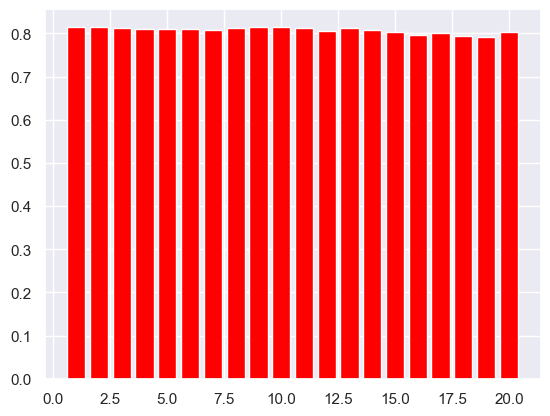

In [45]:

plt.bar(range(1,21,1), test_accuracies, color='red')


<BarContainer object of 20 artists>

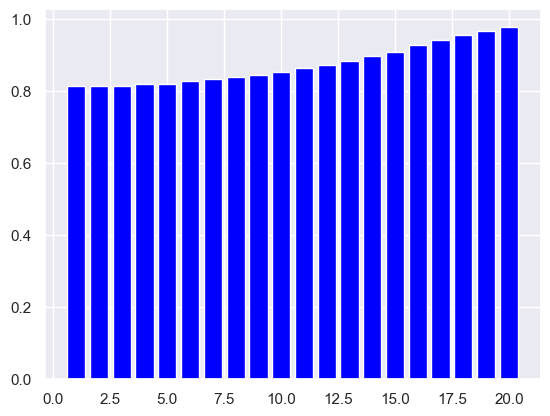

In [44]:
plt.bar(range(1, 21, 1), accuracies, color="blue")

In [50]:
test_accuracies

{1: 0.8138261464750172,
 2: 0.8138261464750172,
 3: 0.813141683778234,
 4: 0.809719370294319,
 5: 0.809719370294319,
 6: 0.809719370294319,
 7: 0.8076659822039699,
 8: 0.811772758384668,
 9: 0.8145106091718002,
 10: 0.8151950718685832,
 11: 0.811772758384668,
 12: 0.8056125941136209,
 13: 0.812457221081451,
 14: 0.8076659822039699,
 15: 0.8021902806297057,
 16: 0.7967145790554415,
 17: 0.8008213552361396,
 18: 0.7946611909650924,
 19: 0.7926078028747433,
 20: 0.8021902806297057}

In [ ]:
dt.score(X_val, y_val)

0.809719370294319

In [ ]:
predictions = dt.predict(X_val)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
float(sum(predictions==y_val)/len(y_val))

0.809719370294319

In [ ]:
answer = pd.DataFrame(zip(predictions, y_val))

In [ ]:
answer

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
1456,1,1
1457,1,1
1458,1,1
1459,1,0


In [ ]:
help(RandomForestClassifier)


Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

NameError: name 'scikitlearn' is not defined

In [85]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=142)

param_grid = {'n_estimators':[100,200,300],
              "min_samples_split": [2, 4],
              "max_depth": [None, 5, 10]}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=142),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
grid_search.best_estimator_.score(X_val, y_val)

0.811088295687885

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=142)

rf.estimator_ = dt

rf.fit(X_train, y_train)

rf.score(X_train, y_train)

1.0

In [81]:
rf.score(X_val, y_val)

0.8165639972621492

In [82]:
test = pd.read_csv('Test Dataset.csv')

test[cols_to_scale] = scaler.transform(test[cols_to_scale])

encoded_cols = list(encoder.get_feature_names_out(cols_to_encode))

test[encoded_cols] = encoder.transform(test[cols_to_encode])

test = test.drop(cols_to_encode, axis=1)

id_column = test['id']

X_test = test.drop('id', axis=1)





In [88]:
predictions = grid_search.best_estimator_.predict(X_test)

In [89]:
submission = pd.DataFrame(zip(id_column, predictions))
submission.columns = ['id', 'target']

submission.to_csv('submission_3.csv', index=False)